## Data Preparation & Exploration

## Introduction
In this notebook, I have explored the dataset to understand its structure, features, and distributions. 
Key objectives include:
- Identifying data quality issues (e.g., missing values, outliers).
- Understanding feature correlations.
- Visualizing the target variable (`fault_type`).

In [3]:
# Importing Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading Dataset
file_path = "../data/Fault_nev_dataset.csv"
data = pd.read_csv(file_path)

In [5]:
# Basic Info of the dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   battery_voltage        1000 non-null   float64
 1   battery_current        1000 non-null   float64
 2   engine_temperature     1000 non-null   float64
 3   motor_efficiency       1000 non-null   float64
 4   tire_pressure          1000 non-null   float64
 5   fuel_efficiency        1000 non-null   float64
 6   speed                  1000 non-null   float64
 7   acceleration           1000 non-null   float64
 8   driving_distance       1000 non-null   float64
 9   ambient_temperature    1000 non-null   float64
 10  humidity               1000 non-null   float64
 11  road_condition         1000 non-null   object 
 12  last_service_distance  1000 non-null   float64
 13  service_frequency      1000 non-null   int64  
 14  repair_cost            1000 non-null   int6

## Missing Values
Below, I have checked for missing values in the dataset. If any are present, I'll address them in the preprocessing step.


In [6]:
# Missing Values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
battery_voltage          0
battery_current          0
engine_temperature       0
motor_efficiency         0
tire_pressure            0
fuel_efficiency          0
speed                    0
acceleration             0
driving_distance         0
ambient_temperature      0
humidity                 0
road_condition           0
last_service_distance    0
service_frequency        0
repair_cost              0
downtime                 0
fault_type               0
time_since_last_fault    0
dtype: int64


## Statistical Summary
This section provides basic statistics (e.g., mean, median, standard deviation) for numerical columns. It helps in identifying potential anomalies or outliers.

In [7]:
# Statistical Summary
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
       battery_voltage  battery_current  engine_temperature  motor_efficiency  \
count      1000.000000      1000.000000         1000.000000       1000.000000   
mean         12.970770        22.745606           95.120286         89.807501   
std           0.876412        10.226646           14.533710          5.729787   
min          11.513896         5.112639           70.000582         80.013068   
25%          12.207920        13.437599           83.067549         84.838015   
50%          12.990422        23.155687           95.030696         89.685586   
75%          13.732959        31.616277          107.955176         94.750816   
max          14.499153        39.979480          119.891043         99.991154   

       tire_pressure  fuel_efficiency        speed  acceleration  \
count    1000.000000      1000.000000  1000.000000   1000.000000   
mean       34.941053        14.984645    59.197061      1.447112   
std         2.868099         2.891948    34.

## Target Variable Distribution
Understanding the distribution of `fault_type` help to identify class imbalances that may impact model performance.


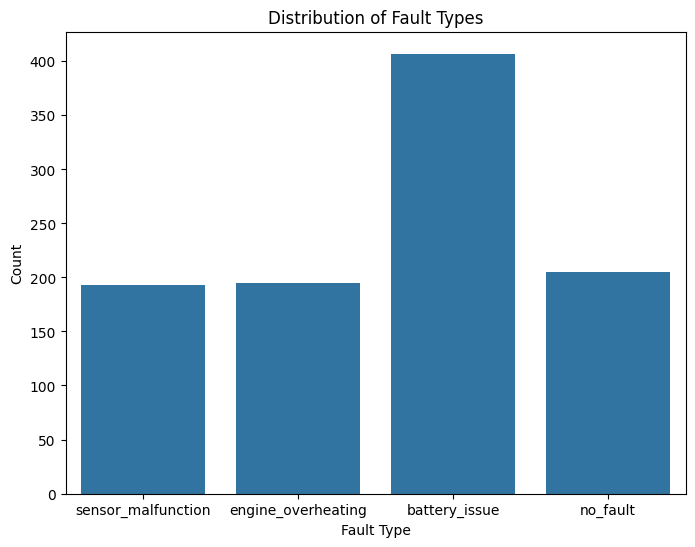

In [8]:
# Visualizing Distribution of Target Variables
plt.figure(figsize=(8, 6))
sns.countplot(x='fault_type', data=data)
plt.title("Distribution of Fault Types")
plt.xlabel("Fault Type")
plt.ylabel("Count")
plt.show()

## Correlation Analysis
The heatmap below shows the correlations between numerical features. Highly correlated features might need attention during feature engineering.


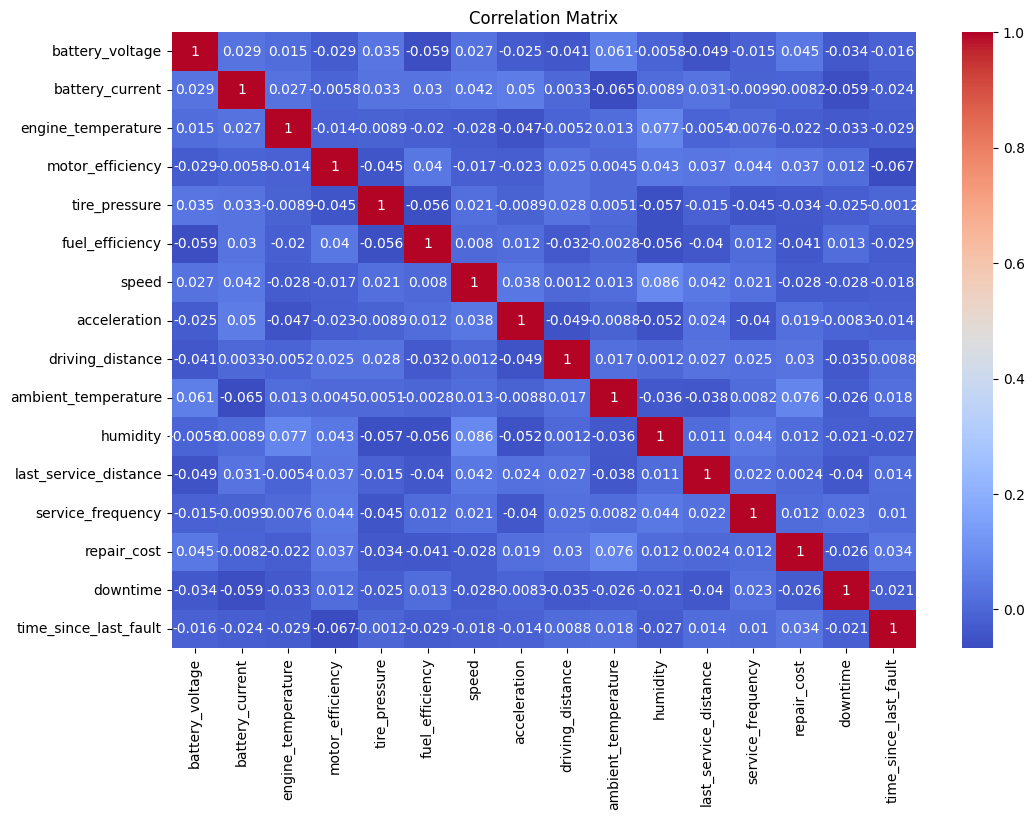

In [9]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=["number"])  # Select only numeric columns
correlation_matrix = numeric_data.corr()  # Calculate correlation only for numeric data
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Model Training & Evaluation

## Introduction
In this notebook, we preprocess the data and train two models:
- **Random Forest**: A traditional machine learning model.
- **Neural Network**: A deep learning model.

The results are logged in MLFlow for tracking and comparison.


In [10]:
# 📌 Set up environment
import sys
import os

# Set working directory to project root
project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), ".."))
sys.path.append(project_root)
print(f"📌 Project root added to Python path: {project_root}")

📌 Project root added to Python path: f:\Portfolio Projects\NEV_Fault_Prediction


In [11]:
# Disable TensorFlow oneDNN optimizations to avoid floating-point rounding issues
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

In [12]:
# 📌 Import libraries
import mlflow
import mlflow.sklearn
import mlflow.keras
import joblib
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


In [13]:
# ✅ Set MLflow tracking
mlflow.set_tracking_uri("file:F:/Portfolio Projects/fault_prediction_project/mlruns")
mlflow.set_experiment("NEV Fault Prediction")

<Experiment: artifact_location='file:///F:/Portfolio%20Projects/fault_prediction_project/mlruns/560277888509444402', creation_time=1738156492984, experiment_id='560277888509444402', last_update_time=1738156492984, lifecycle_stage='active', name='NEV Fault Prediction', tags={}>

In [14]:
# ✅ Load Data Processor
from src.data_processor import DataProcessor

# 📂 **Load Dataset**
data_file_path = "F:/Portfolio Projects/fault_prediction_project/data/Fault_nev_dataset.csv"
processor = DataProcessor(data_file_path)

print("\n📂 Loading Dataset...")
data = processor.load_data()
print(f"✅ Dataset Loaded: {data.shape}")
print(data.head())

Updated working directory: F:\Portfolio Projects\NEV_Fault_Prediction

📂 Loading Dataset...
✅ Dataset Loaded: (1000, 18)
   battery_voltage  battery_current  engine_temperature  motor_efficiency  \
0        12.623620        11.479653           83.085284         93.454060   
1        14.352143        23.966533           82.348940         95.933628   
2        13.695982        35.553104          115.312729         85.009358   
3        13.295975        30.627871           82.477310         92.497482   
4        11.968056        33.229640           83.597486         91.434920   

   tire_pressure  fuel_efficiency       speed  acceleration  driving_distance  \
0      35.719959        13.936355   77.790834      0.116398        360.133962   
1      38.054323        14.734357   20.686363      0.560318        343.641502   
2      37.601609        18.545474  104.687348      2.493737         47.877099   
3      31.538999        13.400044   73.573949      2.300305        461.286202   
4      31.4

In [15]:
# 🛠 **Preprocess Dataset**
print("\n🛠️ Preprocessing Dataset...")
X, y = processor.preprocess(target_column="fault_type", categorical_columns=["road_condition"])
print(f"✅ Features Shape: {X.shape}, Target Shape: {y.shape}")


🛠️ Preprocessing Dataset...
✅ Features Shape: (1628, 17), Target Shape: (1628,)


In [16]:
# 📊 **Split Data**
print("\n📊 Splitting Data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Training Set: {X_train.shape}, {y_train.shape}")
print(f"✅ Testing Set: {X_test.shape}, {y_test.shape}")



📊 Splitting Data...
✅ Training Set: (1302, 17), (1302,)
✅ Testing Set: (326, 17), (326,)


In [17]:
# ✅ **Initialize MLflow Experiment**
mlflow.set_experiment("NEV Fault Prediction")

# -----------------------------------
# 🌲 **Train Random Forest Model**
# -----------------------------------
print("\n🌲 Training Random Forest Model...")

with mlflow.start_run(run_name="Random Forest Classifier"):
    try:
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predictions & Metrics
        y_pred_rf = rf_model.predict(X_test)
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

        print(f"🎯 Random Forest - Accuracy: {accuracy_rf:.2f}, F1 Score: {f1_rf:.2f}")

        # Log model & metrics to MLflow
        mlflow.log_param("Model", "Random Forest")
        mlflow.log_param("n_estimators", 100)
        mlflow.log_metric("Accuracy", accuracy_rf)
        mlflow.log_metric("F1 Score", f1_rf)
        mlflow.sklearn.log_model(rf_model, "random_forest_model")

        print("✅ Random Forest model logged to MLflow.")

    except Exception as e:
        print(f"❌ Error during Random Forest training: {e}")


🌲 Training Random Forest Model...
🎯 Random Forest - Accuracy: 0.66, F1 Score: 0.66


2025/02/02 01:47:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest model logged to MLflow.


In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -----------------------------------
# 🤖 **Train Neural Network Model**
# -----------------------------------
print("\n🤖 Training Neural Network Model...")

with mlflow.start_run(run_name="Deep Learning Model"):
    try:
        # ✅ Encode target labels
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        # ✅ One-hot encoding for categorical classification
        y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
        y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

        # ✅ Define Neural Network Model
        model = Sequential([
            Dense(128, activation='relu', input_dim=X_train.shape[1]),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(len(label_encoder.classes_), activation='softmax')
        ])
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # ✅ Train the Neural Network
        print("🚀 Training the Neural Network...")
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model.fit(X_train, y_train_onehot,
                  validation_data=(X_test, y_test_onehot),
                  epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

        print("✅ Neural Network training complete.")

        # ✅ Save model locally
        model_dir = "F:/Portfolio Projects/fault_prediction_project/models"
        os.makedirs(model_dir, exist_ok=True)
        model_path = os.path.join(model_dir, "deep_learning_model.keras")
        model.save(model_path)
        print(f"✅ Neural Network model saved at {model_path}")

        # ✅ Evaluate Model
        loss, accuracy_nn = model.evaluate(X_test, y_test_onehot, verbose=0)
        y_pred_nn = model.predict(X_test)
        y_pred_classes_nn = tf.argmax(y_pred_nn, axis=1)
        f1_nn = f1_score(y_test_encoded, y_pred_classes_nn, average="weighted")

        # ✅ Log model & metrics to MLflow
        mlflow.log_param("Model", "Deep Learning")
        mlflow.log_param("Learning Rate", 0.001)
        mlflow.log_param("Batch Size", 32)
        mlflow.log_metric("Accuracy", accuracy_nn)
        mlflow.log_metric("F1 Score", f1_nn)
        mlflow.keras.log_model(model, "deep_learning_model")

        print(f"🎯 Neural Network - Accuracy: {accuracy_nn:.2f}, F1 Score: {f1_nn:.2f}")

    except Exception as e:
        print(f"❌ Error during Neural Network training: {e}")


🤖 Training Neural Network Model...
🚀 Training the Neural Network...
Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2401 - loss: 1.4098 - val_accuracy: 0.3129 - val_loss: 1.3671
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3351 - loss: 1.3675 - val_accuracy: 0.3129 - val_loss: 1.3551
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3324 - loss: 1.3542 - val_accuracy: 0.3620 - val_loss: 1.3476
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3902 - loss: 1.3242 - val_accuracy: 0.3712 - val_loss: 1.3317
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3901 - loss: 1.3207 - val_accuracy: 0.3620 - val_loss: 1.3227
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4059 - loss: 1.2956 - val_accuracy: 0.3896 - val_loss: 1.3123
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4071 - loss: 1.2826 - val_accuracy: 0.4172 - val_loss: 1.2933
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s

2025/02/02 01:50:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/02/02 01:50:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🎯 Neural Network - Accuracy: 0.63, F1 Score: 0.62


In [20]:
# -----------------------------------
# 🏆 **Select Best Model & Save**
# -----------------------------------
print("\n🏆 Comparing Models & Saving Best One...")

best_model = rf_model if accuracy_rf >= accuracy_nn else model
best_model_name = "best_rf_model.pkl" if accuracy_rf >= accuracy_nn else "best_nn_model.keras"
best_model_path = f"F:/Portfolio Projects/fault_prediction_project/models/{best_model_name}"

if isinstance(best_model, RandomForestClassifier):
    joblib.dump(best_model, best_model_path)
else:
    best_model.save(best_model_path)

print(f"🏆 ✅ Best model saved as {best_model_name} with accuracy: {max(accuracy_rf, accuracy_nn):.2f}")


🏆 Comparing Models & Saving Best One...
🏆 ✅ Best model saved as best_rf_model.pkl with accuracy: 0.66


## Results Summary & Deployment

In [21]:
# 📌 Set up environment
import sys
import os

# Set working directory to project root
project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), ".."))
sys.path.append(project_root)
print(f"📌 Project root added to Python path: {project_root}")

# Disable TensorFlow oneDNN optimizations
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

📌 Project root added to Python path: F:\Portfolio Projects


In [22]:
# 📌 Import libraries
import mlflow
import mlflow.sklearn
import mlflow.keras
import joblib
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# ✅ Set MLflow tracking
mlflow.set_tracking_uri("file:F:/Portfolio Projects/fault_prediction_project/mlruns")

# ✅ Load Data Processor
from src.data_processor import DataProcessor


In [ ]:
# -----------------------------------
# 📂 **Retrieve Experiment Results**
# -----------------------------------
experiment_name = "NEV Fault Prediction"
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)

if experiment:
    experiment_id = experiment.experiment_id
    print(f"🔍 Experiment Found: {experiment_name} (ID: {experiment_id})")

    # ✅ Retrieve All Runs
    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    display(runs)
    
    # ✅ Extract Accuracy & F1 Scores
    runs_sorted = runs.sort_values(by=["metrics.Accuracy"], ascending=False)
    best_run = runs_sorted.iloc[0]  # Best Model (Highest Accuracy)
    
    print("\n🏆 **Best Model Summary**")
    print(f"🔹 Run ID: {best_run['run_id']}")
    print(f"🔹 Model Type: {best_run['params.Model']}")
    print(f"🔹 Accuracy: {best_run['metrics.Accuracy']:.4f}")
    print(f"🔹 F1 Score: {best_run['metrics.F1 Score']:.4f}")

else:
    print(f"❌ Experiment '{experiment_name}' not found in MLflow.")
    raise ValueError("Experiment not found. Ensure training was completed successfully.")


In [24]:
print(runs[["params.Model", "metrics.Accuracy"]].head())


    params.Model  metrics.Accuracy
0  Deep Learning          0.628834
1  Deep Learning          0.647239
2  Random Forest          0.656442
3  Deep Learning          0.610429
4  Random Forest          0.656442



📊 **Plotting Model Performance Metrics**


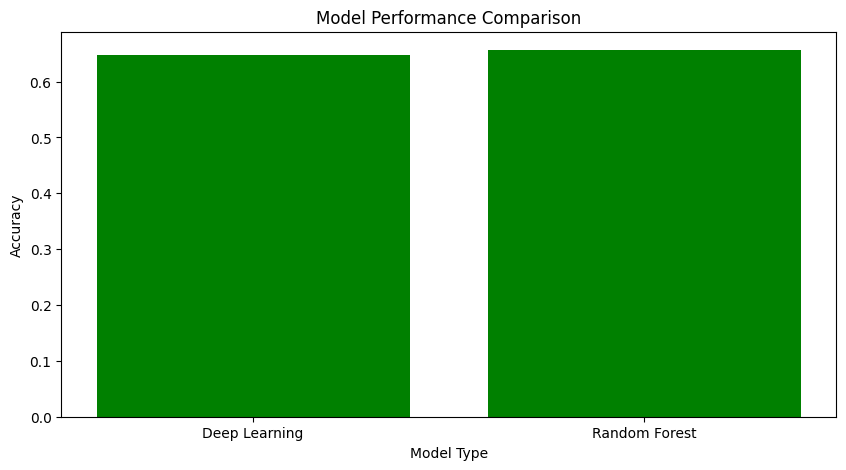

In [27]:
# -----------------------------------
# 📊 **Visualizing Model Performance**
# -----------------------------------
print("\n📊 **Plotting Model Performance Metrics**")

plt.figure(figsize=(10, 5))

# Drop rows where Model or Accuracy is missing
runs_cleaned = runs.dropna(subset=["params.Model", "metrics.Accuracy"])

plt.bar(runs_cleaned["params.Model"], runs_cleaned["metrics.Accuracy"], color=["green"])
plt.xlabel("Model Type")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


In [28]:
# -----------------------------------
# 🚀 **Load the Best Model**
# -----------------------------------
print("\n🚀 Loading the Best Model from MLflow...")

best_model_name = best_run["params.Model"]
best_run_id = best_run["run_id"]

if best_model_name == "Random Forest":
    model_uri = f"runs:/{best_run_id}/random_forest_model"
    best_model = mlflow.sklearn.load_model(model_uri)
    model_type = "sklearn"
elif best_model_name == "Deep Learning":
    model_uri = f"runs:/{best_run_id}/deep_learning_model"
    best_model = mlflow.keras.load_model(model_uri)
    model_type = "keras"
else:
    print(f"❌ Unsupported model type: {best_model_name}")
    raise ValueError("Invalid model type.")

print(f"✅ Best Model Loaded: {best_model_name} (Run ID: {best_run_id})")


🚀 Loading the Best Model from MLflow...
✅ Best Model Loaded: Random Forest (Run ID: 6d7cda21131f41a08ddccfb8e948ed04)


In [29]:
# -----------------------------------
# 🛠️ **Load Test Data**
# -----------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

print("\n📂 Loading Test Data for Model Evaluation...")
data_file_path = "F:/Portfolio Projects/fault_prediction_project/data/Fault_nev_dataset.csv"
processor = DataProcessor(data_file_path)

# Load & preprocess test data
data = processor.load_data()
X, y = processor.preprocess(target_column="fault_type", categorical_columns=["road_condition"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Encode labels for Deep Learning models
if model_type == "keras":
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# -----------------------------------
# 📌 **Evaluate Model Performance**
# -----------------------------------
print("\n📊 **Evaluating Best Model on Test Data**")

if model_type == "sklearn":
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

elif model_type == "keras":
    y_pred_probs = best_model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average="weighted")

print(f"🏆 Final Model Performance on Test Data")
print(f"🎯 Accuracy: {accuracy:.4f}")
print(f"🎯 F1 Score: {f1:.4f}")



📂 Loading Test Data for Model Evaluation...

📊 **Evaluating Best Model on Test Data**
🏆 Final Model Performance on Test Data
🎯 Accuracy: 0.6564
🎯 F1 Score: 0.6618


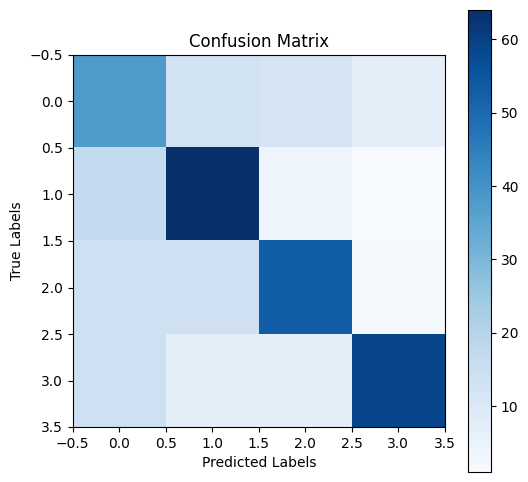

In [30]:
# ✅ **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [31]:
# ✅ **Classification Report**
print("\n📜 **Classification Report**")
print(classification_report(y_test, y_pred))



📜 **Classification Report**
                    precision    recall  f1-score   support

     battery_issue       0.46      0.54      0.50        70
engine_overheating       0.65      0.74      0.70        86
          no_fault       0.70      0.64      0.67        83
sensor_malfunction       0.86      0.68      0.76        87

          accuracy                           0.66       326
         macro avg       0.67      0.65      0.65       326
      weighted avg       0.68      0.66      0.66       326



In [32]:
import os
import pandas as pd

# ✅ Define the path
reports_dir = "F:/Portfolio Projects/fault_prediction_project/reports"
results_file_path = os.path.join(reports_dir, "final_model_results.csv")

# ✅ Ensure the directory exists before saving the file
os.makedirs(reports_dir, exist_ok=True)  # ✅ FIX: Create directory if it does not exist

# ✅ Save results
results_df = pd.DataFrame({"Model": [best_model_name], "Accuracy": [accuracy], "F1 Score": [f1]})
results_df.to_csv(results_file_path, index=False)
print(f"✅ Results saved at: {results_file_path}")

print("\n🎯 **Results Summary Completed!** ✅")


✅ Results saved at: F:/Portfolio Projects/fault_prediction_project/reports\final_model_results.csv

🎯 **Results Summary Completed!** ✅


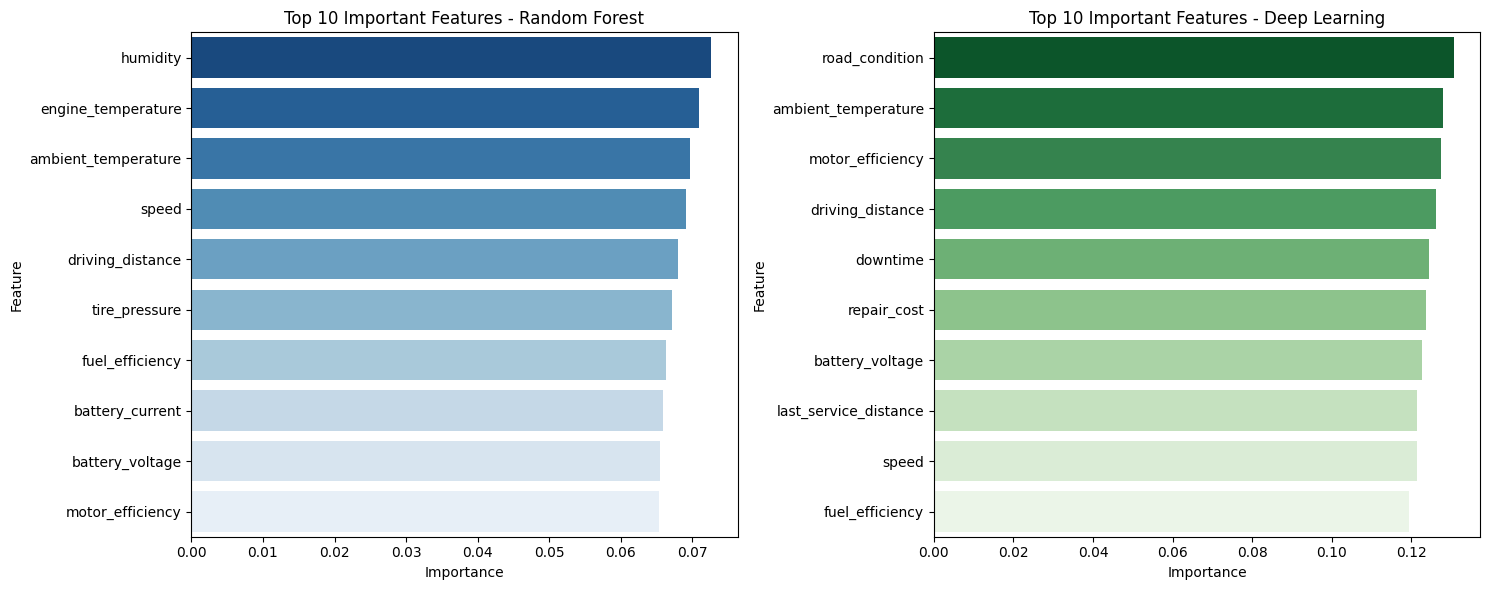

In [40]:
import warnings
import os
import logging
import numpy as np
import pandas as pd

# Suppress warnings
warnings.filterwarnings("ignore")  # Hide all warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Hide TensorFlow warnings
logging.getLogger("mlflow").setLevel(logging.ERROR)  # Hide MLflow warnings
np.seterr(all="ignore")  # Hide NumPy warnings
pd.options.mode.chained_assignment = None  # Hide Pandas warnings
logging.getLogger().setLevel(logging.ERROR)  # Hide all logs


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf

# ✅ Load Test Data
data_file_path = "F:/Portfolio Projects/fault_prediction_project/data/Fault_nev_dataset.csv"
processor = DataProcessor(data_file_path)
data = processor.load_data()
X, y = processor.preprocess(target_column="fault_type", categorical_columns=["road_condition"])
feature_names = X.columns

# ✅ Load Best Models
rf_model_path = "F:/Portfolio Projects/fault_prediction_project/models/best_rf_model.pkl"
nn_model_path = "F:/Portfolio Projects/fault_prediction_project/models/deep_learning_model.keras"

rf_model = joblib.load(rf_model_path)  # Load Random Forest model
nn_model = tf.keras.models.load_model(nn_model_path)  # Load Deep Learning model

# ---------------------------------------------
# 🌲 **Feature Importance - Random Forest**
# ---------------------------------------------
rf_importance = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": rf_importance})
rf_importance_df = rf_importance_df.sort_values(by="Importance", ascending=False)

# ---------------------------------------------
# 🤖 **Feature Importance - Deep Learning**
# ---------------------------------------------
# Extract first layer weights
first_layer_weights = nn_model.layers[0].get_weights()[0]  # Shape: (num_features, num_neurons)
dl_importance = np.mean(np.abs(first_layer_weights), axis=1)  # Compute mean absolute weight per feature

dl_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": dl_importance})
dl_importance_df = dl_importance_df.sort_values(by="Importance", ascending=False)

# ---------------------------------------------
# 📊 **Plot Feature Importance - Side by Side**
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 🌲 Random Forest Plot
sns.barplot(x="Importance", y="Feature", data=rf_importance_df.head(10), ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Important Features - Random Forest")

# 🤖 Deep Learning Plot
sns.barplot(x="Importance", y="Feature", data=dl_importance_df.head(10), ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Important Features - Deep Learning")

plt.tight_layout()
plt.show()
